In [25]:
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = [8, 8]
import os
import numpy as np
from plantcv import plantcv as pcv

In [26]:
# Set debug to plot
pcv.params.debug = "plot"
# Color card input/output directory
color_card_dir = os.path.expanduser("~/data/camelina/images/color_cards/")

# Generate Color Card Masks

## Target Image Mask

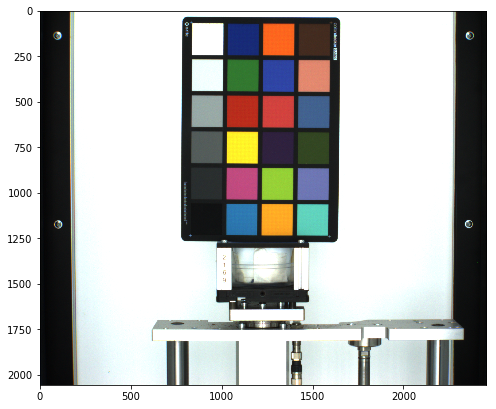

In [27]:
# Target image filename
target_file = "TM009_B_092115_VIS_SV_0_z1500_h2_g0_e100_258104_0.png"
# Read image
target_img, target_path, target_filename = pcv.readimage(filename=os.path.join(color_card_dir, target_file))

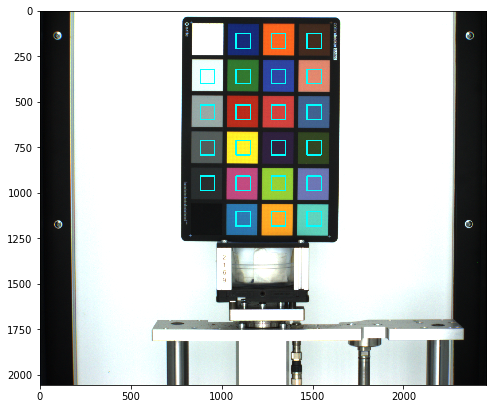

In [28]:
# Create labeled color card mask
target_mask = pcv.transform.create_color_card_mask(rgb_img=target_img, chip_dims=(80, 80), start_coord=(880, 130), 
                                                   spacing=(195, 195), nrows=6, ncols=4, exclude=[20, 0])

In [29]:
# Save mask
pcv.print_image(img=target_mask, filename=os.path.join(color_card_dir, target_filename[:-4] + "_mask.png"))

## Source z1 Image Mask

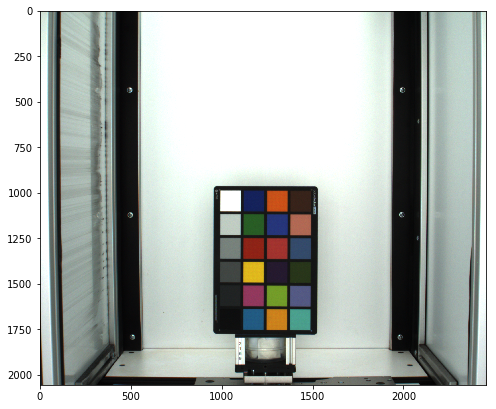

In [30]:
# Target image filename
z1_file = "TK002_C_041117_VIS_SV_0_z1_h1_g0_e82_260948_0.png"
# Read image
z1_img, z1_path, z1_filename = pcv.readimage(filename=os.path.join(color_card_dir, z1_file))

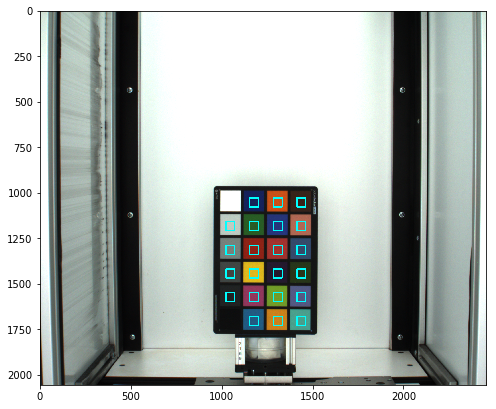

In [31]:
# Create labeled color card mask
z1_mask = pcv.transform.create_color_card_mask(rgb_img=z1_img, chip_dims=(50, 50), start_coord=(1020, 1030), 
                                                   spacing=(130, 130), nrows=6, ncols=4, exclude=[20, 0])

In [32]:
# Save mask
pcv.print_image(img=z1_mask, filename=os.path.join(color_card_dir, z1_filename[:-4] + "_mask.png"))

## Source z500 Image Mask

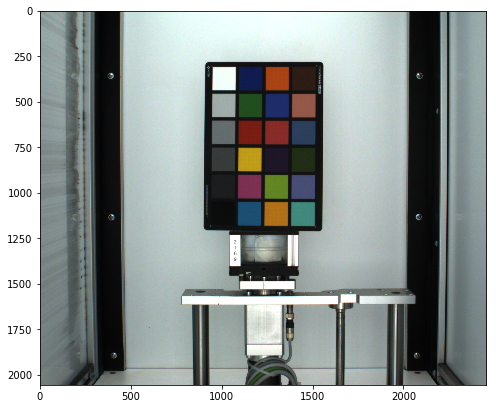

In [33]:
# Target image filename
z500_file = "TK002_C_041117_VIS_SV_0_z500_h2_g0_e82_169478_0.png"
# Read image
z500_img, z500_path, z500_filename = pcv.readimage(filename=os.path.join(color_card_dir, z500_file))

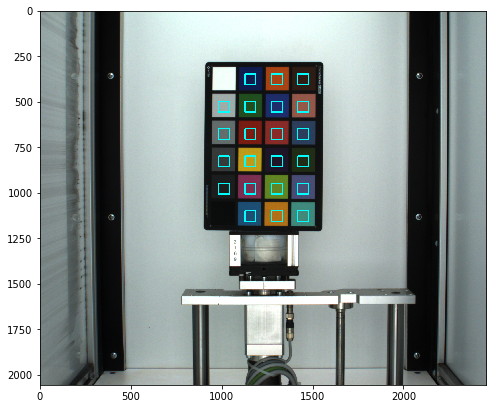

In [34]:
# Create labeled color card mask
z500_mask = pcv.transform.create_color_card_mask(rgb_img=z500_img, chip_dims=(60, 60), start_coord=(980, 350), 
                                                   spacing=(145, 150), nrows=6, ncols=4, exclude=[20, 0])

In [35]:
# Save mask
pcv.print_image(img=z500_mask, filename=os.path.join(color_card_dir, z500_filename[:-4] + "_mask.png"))

## Source z2500 Image Mask

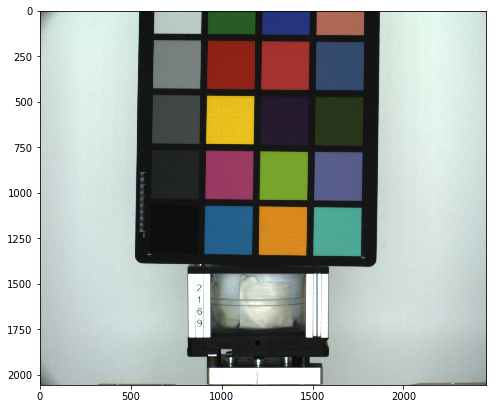

In [36]:
# Target image filename
z2500_file = "TK002_C_041117_VIS_SV_0_z2500_h2_g0_e82_123020_0.png"
# Read image
z2500_img, z2500_path, z2500_filename = pcv.readimage(filename=os.path.join(color_card_dir, z2500_file))

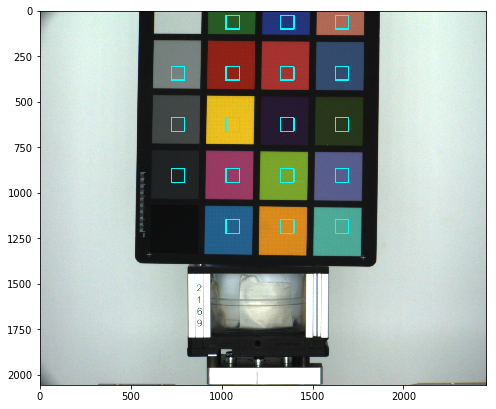

In [37]:
# Create labeled color card mask
z2500_mask = pcv.transform.create_color_card_mask(rgb_img=z2500_img, chip_dims=(75, 75), start_coord=(720, 30), 
                                                   spacing=(300, 280), nrows=5, ncols=4, exclude=[16, 0])
# Fix labels due to missing first row
z2500_mask[np.where(z2500_mask > 0)] += 40

In [38]:
# Save mask
pcv.print_image(img=z2500_mask, filename=os.path.join(color_card_dir, z2500_filename[:-4] + "_mask.png"))

# Generate Color Transformation Matrices

## Color correction for z1

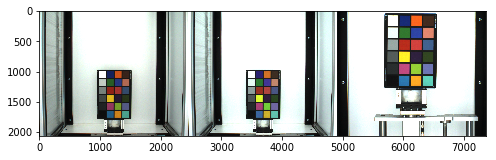

In [39]:
z1_outdir = os.path.join(color_card_dir, "TK002_z1_transformation_matrices")
_, _, z1_transformation_matrix, corrected_img = pcv.transform.correct_color(target_img=target_img, 
                                                                            target_mask=target_mask, 
                                                                            source_img=z1_img, source_mask=z1_mask, 
                                                                            output_directory=z1_outdir)

## Color correction for z500

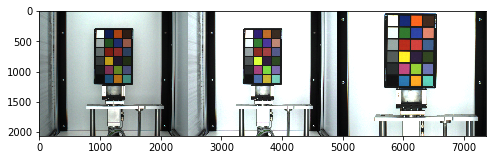

In [40]:
z500_outdir = os.path.join(color_card_dir, "TK002_z500_transformation_matrices")
_, _, z500_transformation_matrix, corrected_img = pcv.transform.correct_color(target_img=target_img, 
                                                                              target_mask=target_mask, 
                                                                              source_img=z500_img, 
                                                                              source_mask=z500_mask,
                                                                              output_directory=z500_outdir)

## Color correction for z2500

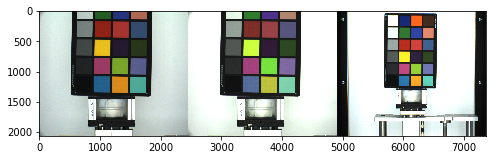

In [41]:
z2500_outdir = os.path.join(color_card_dir, "TK002_z2500_transformation_matrices")
tm, sm, z2500_transformation_matrix, corrected_img = pcv.transform.correct_color(target_img=target_img, 
                                                                              target_mask=target_mask, 
                                                                              source_img=z2500_img, 
                                                                              source_mask=z2500_mask,
                                                                              output_directory=z2500_outdir)